# <span style="color:Blue">공부</span> : 노트장

### 타이타닉 EDA 진행
###### [1차 작업] 23.04.01 [2차 작업] 23.04.02 [3차 작업] 23.04.08
#### EDA(Exploratory Data Analysis, 탐색적 데이터 분석)란?
#### -> 수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정
- 데이터를 분석하고 결과를 내는 과정에 있어서 <span style="color:red">지속적으로</span> 해당 데이터에 대한 ‘탐색과 이해’를 기본으로 가져야 한다는 것을 의미
######
###### EDA를 해야하는 이유
###### (1) 데이터의 분포 및 값을 검토함으로써 "데이터가 표현하는 현상"을 더 잘 이해하고 데이터에 대한 "잠재적인 문제"를 발견
###### (2) 다양한 각도에서 살펴보는 과정을 통해 문제 정의 단계에서 미쳐 발생하지 못했을 "다양한 패턴"을 발견
###### (3) 이를 바탕으로 기존의 가설을 수정하거나 새로운 가설을 세울 수 있습니다.
######
### EDA가 왜 어려울까?
- 누구에게나 인지편향(cognitive bias)가 있기 때문
- 분석을 하는 사람의 경험에 의한 비논리적 추론으로 잘못된 데이터를 필터링한다던지 속성값을 지운다던지 하는 이유로 잘못된 판단을 할 수 있음
- 우리는 무의식적으로 다른 사람들의 이야기를 비롯한 외부의 정보를 접할 때, 스스로의 경험으로 판단을 먼저 내리는 경향이 있음
- 이는 잘못된 것이라기 보다는 기존에 경험했던 것으로 먼저 판단을 내리게 하여 에너지를 효율적으로 관리하기 때문에 생기는 편향(bias)임
- 빠르게 변화하고 그 변화하는 정보들에 대해서 유연하게 대처하는 능력이 중요해지는 시대에는 인지적 편향을 조금 내려놓기!!
- 대신, 다른 사람들의 이야기와 정보(데이터)에 대해 있는 그대로 이해할 수 있는 능력이 필요함

### 참고문헌
- https://brownbears.tistory.com/633
- https://jalynne-kim.medium.com/데이터분석-기초-eda의-개념과-데이터분석-잘-하는-법-a3cac2cc5ebc
- Dacon의 코드공유 참고 https://dacon.io/competitions/open/235539/codeshare
- https://www.kaggle.com/code/subinium/kakr-eda/notebook
- 적극 추천 게시글 https://www.kangtaeho.com/89
- 자료 형태 종류 https://horae.tistory.com/entry/범주형수치형이상형연속형명목형순서형-정리
- 이거 좋음 https://oziguyo.tistory.com/10
- 
- 
---

#### <span style="color:red">[스스로에게 질문하기!]</span> " raw data(미가공된 데이터)에 대한 이해하기 "
######
- train.csv는 무엇이고 어떻게 쓰이는가?
###### ans. 훈련 데이터이며, 분석 모델(?)을 만드는 실험용 데이터 셋이라고 생각합니다.
- test.csv는 무엇이고 어떻게 쓰이는가?
###### ans. 검정 데이터이며, 훈련 데이터로 만든 모델에 적용시켜 결과를 만들게 하는 데이터 셋이라고 생각합니다.
- submisson.csv는 무엇이고 어떻게 쓰이는가?
###### ans. 결과 데이터 셋이며, 훈련 데이터로 만든 모델에 테스트 데이터를 적용하여 도출된 결과와 비교할 수 있는 데이터 셋이라고 생각합니다.
- 우리가 이 데이터 분석을 왜 하려는가? [개인적인 목표]
###### ans. 파이썬을 활용한 "데이터 분석"을 가장 기초적인 개념부터 활용까지 경험해보기에 Dacon "타이타닉" 프젝이 가장 알맞음.
###### ans. 다른 데이터를 가지고 "EDA", "데이터 전처리", "모델링" 등 데이터 분석을 직접 구현할 수 있는 능력을 습득하기!
- 이 데이터 분석의 최종 목표는 무엇인가?
###### ans. 어떤 승객이 어떤 조건에서 어떻게 살아 남는 확율[생존율]을 가질 수 있는지를 분석해본다.
---

#### <span style="color:red">[결측값 처리]</span> "결측치 처리 및 데이터"
######
- 결측치(missing value) : 값이 없는 데이터로 null, NaN, N/A 등으로 표시
- 데이터에 "이상치"가 있으면 이상치가 왜 발생했는지 의미를 파악하는 것이 중요함! [의미가 없다면 우선 PASS!]
- 가장 중요 : 어떻게 대처해야 할지(제거, 대체, 유지 등)를 판단해야 함!
###### ex. 데이터의 타입이 integer인데 string이나 object 형태라면 사용할 수 없어서 필터링으로 제거 혹은 변형 필요!
###### ㄴ 수치형 데이터인데 범주형으로 되어 있다면 데이터 타입이 ‘object’로 뜸! 수치형으로 변환해줘야 한다. (ex. astype 활용)
###### 
- 이상값을 찾는 방법
###### (1) 개별 데이터 관찰
###### (2) 통계 값 활용 (summary statistics)
###### (3) 시각화 활용[확률밀도 함수, 히스토그램, 점 플롯(dotplot), 워드 클라우드, 시계열 차트, 지도 등]
###### ㄴ 데이터를 기반으로 그래프를 그릴 때, 해당 그래프를 통해 어떤 의미를 얻어야 하는지 염두하면서 그려야 함!
###### ㄴ 데이터 분석을 통해 말하고자 하는 바를 제대로 전달할 수 있는 기술이 데이터분석가로서 가장 잘 갖춰야 하는 기술이라고 생각함!
###### (4) 알고리즘 활용 - 대표적인 알고리즘으로 K-means를 통해 이상치를 확인 할 수 있습니다.
---

# <span style="color:Blue">실습1</span> : EDA 4단계로 진행하기

## <span style="color:red">[0]</span> 데이터 파악하기 1

### 1. train.csv / test.csv : 타이타닉 탑승자들 중 일부의 인적 정보와 생존 여부 데이터
### 2. sample_submission.csv : 정답 파일의 예시
- PassengerID : 탑승객 고유 아이디 <span style="color:red">[범주형 - 명목형]</span> (0~891)
- Survival : 탑승객 생존 유무 <span style="color:red">[범주형 - 명목형]</span> (0: 사망, 1: 생존)
- Pclass : 등실의 등급 <span style="color:red">[범주형 - 명목형]</span> (1, 2, 3)
- Name : 이름 <span style="color:red">[범주형 - 명목형]</span> (영문으로 다량)
- Sex : 성별 <span style="color:red">[범주형 - 명목형]</span> (female, male)
- Age : 나이 <span style="color:red">[수치형 - 연속형]</span> (number)
- Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수 <span style="color:red">[수치형 - 이산형]</span> (number)
- Parch : 함께 탐승한 부모, 자식의 수 <span style="color:red">[수치형 - 이산형]</span> (number)
- Ticket :티켓 번호 <span style="color:red">[범주형 - 명목형]</span> (이해 불가)
- Fare : 티켓의 요금 <span style="color:red">[수치형 - 연속형]</span> (number)
- Cabin : 객실번호 <span style="color:red">[범주형 - 명목형]</span> (이해 불가)
- Embarked : 배에 탑승한 항구 이름 <span style="color:red">[범주형 - 명목형]</span> ( C = Cherbourn, Q = Queenstown, S = Southampton) 
---
##### [표1] 자료 형태 파악하기
|분류|데이터|설명|예시|
|:---:|:---:|:---:|:---:|
|범주형|명목형|숫자로 표시할 수 없으나, 편의상 숫자화.|남자-0, 여자-1|
|범주형|순서형|숫자로  표시할 수 없으나, 편의상 숫자화. (순위 개념)|소득분위 10분위 > 9 분위 > 8 분위|
|수치형|연속형|데이터가 연속량으로서 셀 수 있는 형태|키 - 166.1cm|
|수치형|이산형|데이터가 비연 속량으로서 셀 수 있는 형태|자식 수 5명|
##### [표2] 데이터 조합 별 통계 및 시각화 방법
|데이터 조합|요약통계|시각화|
|:---:|:---:|:---:|
|범주형 - 범주형|교차 테이블|모자이크 플롯|
|범주형 - 수치형|카테고리별 통계 값|박스 플롯|
|수치형 - 수치형|상관계수|산점도|
---

## <span style="color:red">[1]</span> 라이브러리 불러오기 및 데이터 가져오기

#### 참고로 각 라이브러리 불러오기 전, 설치를 해줘야 함 [pip 명령어로 다운해줌]
- pip install pandas, numpy, -U scikit-learn 등
- 데이터를 불러올 경로를 지정해줘도 됨! -> %cd "/Users/raekkkky/Desktop/DNA/Project1"
- 현재 경로를 얻는 함수 [import os] [print(os.getcwd())]

In [1]:
# 데이터 분석 라이브러리
import numpy as np # Numpy는 "과학 계산 및 수학 계산"에 쓰이는 라이브러리[모듈] '데분정 - p28'
import pandas as pd # Pandas는 "데이터 처리 및 분석"

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 혹은 아래와 같이 함수를 선언하면 경고 안뜸!
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# 오류가 아닌 '경고'가 뜬다면, "numeric_only = True" 넣어주기!

In [2]:
# csv파일로 제공되는 정형데이터는 pd.read_csv()로 읽어옵니다.
train = pd.read_csv('/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project1/train.csv')
test = pd.read_csv('/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project1/test.csv')
submisson = pd.read_csv('/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project1/submission.csv')
# 파일 경로 얻는 꿀탑 : MAC기준 option누른 상태로 객체 클릭 "경로 복사"

In [ ]:
test.describe()

## <span style="color:red">[2]</span> 데이터 파악하기 2

#### 간단히 데이터의 형태를 살펴보는 방법
- head() : 상위 5개, 괄호 안에 숫자로 개수 변경 가능
- tail() : 하위 5개, 괄호 안에 숫자로 개수 변경 가능
- sample() : 랜덤 5개, 괄호 안에 숫자로 개수 변경 가능
- info() : 각 feature 데이터의 null과 type을 확인할 수 있습니다.
#### object는 수치형이 아닌 자료형으로 이해하시면 되고 대부분 string입니다.
#### 후에 object인 feature는 대부분의 사용할 수 없으니 전처리 과정이 필요합니다.
- describe() : 수치형 데이터의 아래 통계값을 추출할 수 있습니다.
- isnull().sum() : 결측값 확인하기

In [ ]:
train

In [ ]:
test

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
print(train.shape, test.shape);
print('train:'+str(len(train))+'행','test:'+str(len(test))+'행');

In [3]:
# train 데이터 결측값 확인하기
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# test 데이터 결측값 확인하기
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# train 데이터 결측값 및 DataType 확인하기
train.info()

In [ ]:
# test 데이터 결측값 및 DataType 확인하기
test.info()

In [ ]:
# Embarked의 빈도가 가장 많은 것을 찾기 [후에, 결측값 처리에 사용될 예정]
train['Embarked'].value_counts()

### 총 정리
1. [결측값] train은 Age177개, Cabin687개, Embarked 2개
2. [결측값] test는 Age86개, Cabin327개, Fare 1개
3. Name의 경우 정해진 형식이 없이 누구는 괄호가 있고, 누구는 ""이 있는 것을 확인 
4. Sex의 경우 문자형태로 데이터가 제공되어서 Encoding이 필요 [즉, 이산형으로 변환]
5. Ticket의 경우 숫자로만 이루어진 값과 알파벳이 섞임 (특별한 의미가 있는지 확인 필요)

## <span style="color:red">[3]</span> 데이터 시각화하기
###### <span style="color:green">{시각화는 아직 많이 못해봄..}</span>

In [ ]:
# 데이터 간의 상관관계 파악하기!
train.corr(numeric_only = True)

## <span style="color:red">[4]</span> 카테고리 별 생존율 비교하기
###### <span style="color:green">{생존율 비교 우선 미실시..}</span>

###### 이 작업은 미실시함. [출처 부분을 통해 따로 학습 요망]
- Sex : 여성의 생존율이 남성에 비해 높다
- Pclass : 1등급 객실의 승객의 생존율이 높고, 3등급 객실의 승객은 생존율이 많이 낮다. 특히 여성의 경우 1등급 객실의 여성승객은 생존율이 100%에 가깝다.
- Age : 어린 아이의 경우 생존율이 가장 높고, 15~35세 승객은 많이 사망한 것을 알 수 있다.
- Embarked : C지역에서 생존자들의 확율이 높다는 것을 알 수 있다.
- Parch+SibSp : 1or2명의 가족을 가진 승객과 1or3명의 부모자식을 가진 승객의 생존율이 높다.

# <span style="color:Blue">실습2</span> : 데이터 전처리 (결측값 채워주기 + 변수 변환)

## <span style="color:red">[1]</span> 결측값 채우기
###### "각각의 상관관계를 구한 다음, 상관관계가 높은 변수를 찾고 그 변수를 기준으로 결측값을 넣는게 제일 좋을 듯"
###### "너무 패키지나 라이브러리 사용말고 교수니 말씀처럼 직접 함수 제작해서 하는 것이 좋을 듯 함"

### <span style="color:green">[1]</span> Embarked 결측값 채우기 [train]

In [5]:
# 많은 승객들이 S에서 승선한것을 알 수 있기 때문에 Embarked에 Null인 데이터는 S에서 승선한것으로 채워넣는다

train['Embarked'].fillna('S',inplace=True)

### <span style="color:green">[2]</span> Name 분류 후 Age 결측값 채우기 [train, test]

#### <span style="color:yellow">[2-1]</span> Name 분류 후 Age 결측값 채우기 [train]

In [6]:
# Crosstab으로 전체 이름이 어떤 것들이 있는지 확인하고 몇명이 있는지 확인한다. [시각화 사용]
# Dr, Don, MIIe 등등 오타로 보이는 이름들이 보인다. -> Mr, Mrs, Miss, Other로 변경한다.
# 참고로 Master는 Mr로 불릴 정도의 나이가 안된 어린 나이 남자에 대한 호칭이다.
# 정규표현식임 뒤쪽 저거 영어!!

train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.')
print(train['Initial'])
print(train['Name'])

pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r')

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object
0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [7]:
# 위에서 전체 이름 종류를 확인했으면 Master, Miss, Mr, Mrs, Other로 이름을 줄여서 분류한다.

train['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [8]:
# 해당 이름별로 나이의 평균을 구해본다. [반올림한다!]
# 어린아이(Master)는 5살, Miss는 22세, Mr는 33세, Mrs는 36세, other은 46세로 평균을 구한다.

train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [9]:
# 위 평균값을 이용하여 Age에 Null인 데이터에 평균값을 넣어준다.
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

# Age데이터에 이제 Null이 있는지를 확인한다.
train.Age.isnull().sum()

0

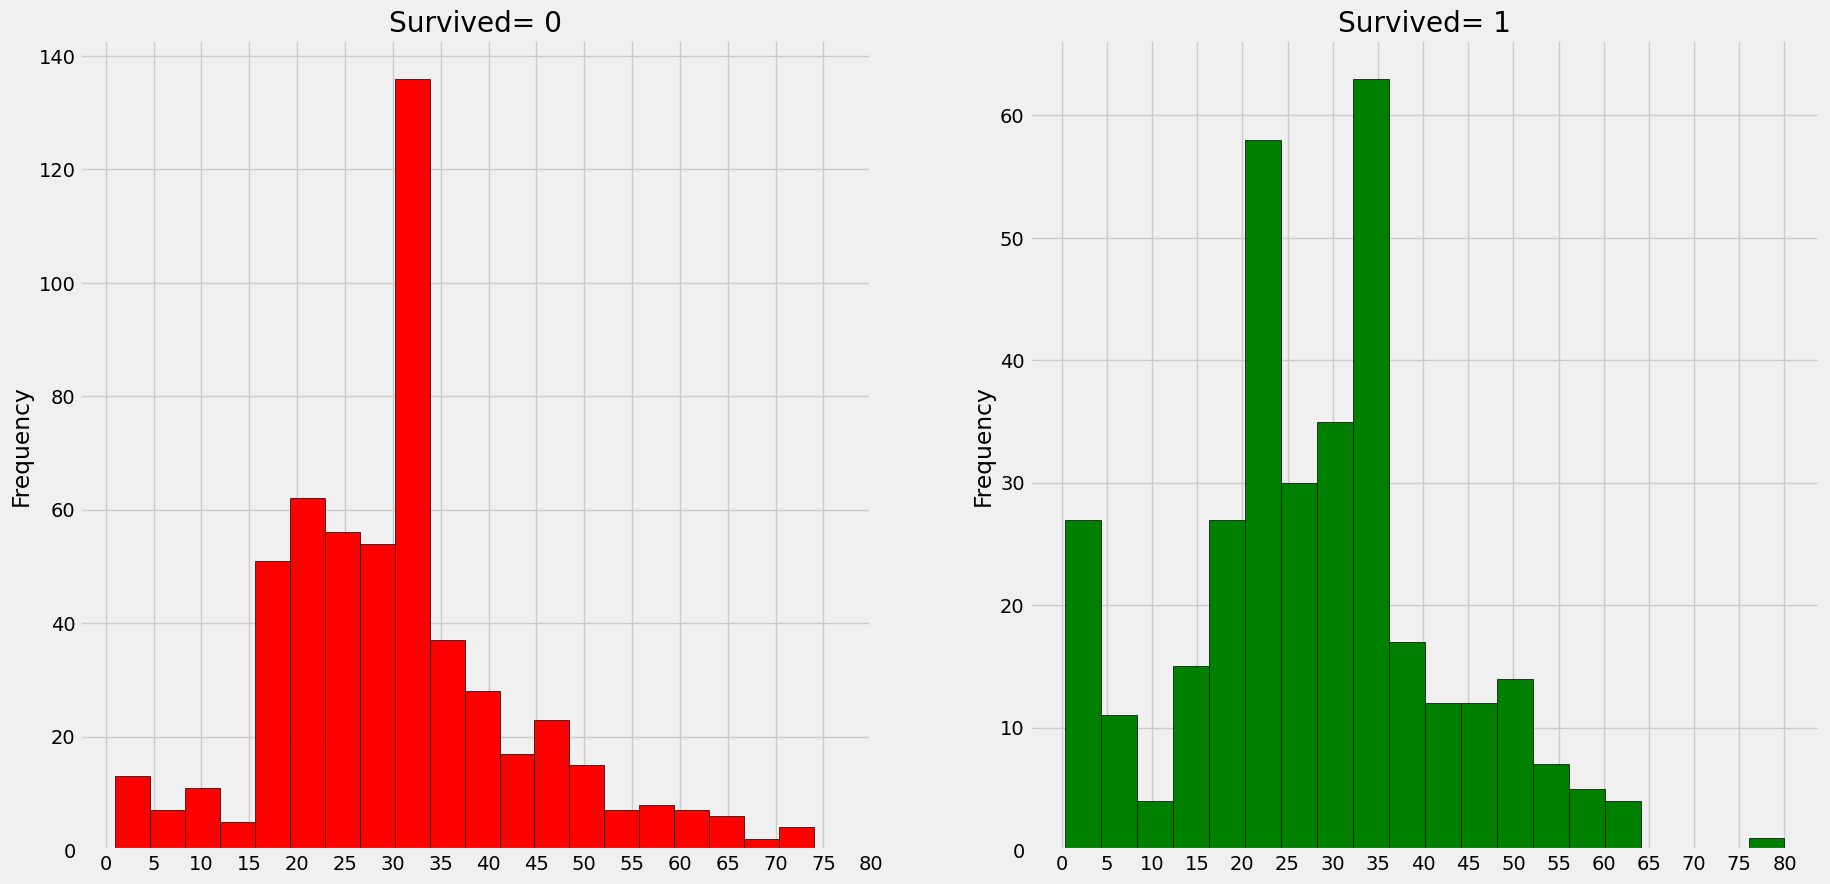

In [10]:
# 이제 나이별로 사망자 수와 생존자 수를 그래프로 확인한다.
#사망자 중 30대가 제일 많았으며 생존자 중에서는 30대, 20대가 많은 것을 확인 할 수 있다.

f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

#### <span style="color:yellow">[2-2]</span> Name 분류 후 Age 결측값 채우기 [test]

In [11]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.')
print(test['Initial'])
print(test['Name'])

pd.crosstab(test.Initial,test.Sex).T.style.background_gradient(cmap='summer_r')

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Initial, Length: 418, dtype: object
0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object


Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [12]:
# 위에서 전체 이름 종류를 확인했으면 Master, Miss, Mr, Mrs, Other로 이름을 줄여서 분류한다.

test['Initial'].replace(
    ['Ms','Dr','Col','Rev','Dona'],
    ['Miss','Mr','Other','Other','Mrs'],inplace=True)

pd.crosstab(test.Initial,test.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,79,0,73,0
male,21,0,241,0,4


In [13]:
# 해당 이름별로 나이의 평균을 구해본다. [반올림한다!]
# 어린아이(Master)는 7살, Miss는 22세, Mr는 32세, Mrs는 39세, other은 43세로 평균을 구한다.

test.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.904762
Other     42.750000
Name: Age, dtype: float64

In [14]:
# 위 평균값을 이용하여 Age에 Null인 데이터에 평균값을 넣어준다.
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age']=32
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=39
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=7
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=43

# Age데이터에 이제 Null이 있는지를 확인한다.
test.Age.isnull().sum()

0

### <span style="color:green">[3]</span> Fare의 결측값 채우기 [test]

In [15]:
# train 데이터의 Fare 통계값을 보고 중앙값으로 대체함
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [17]:
test['Fare'].isnull().sum()

0

### <span style="color:green">[4]</span> Cabin의 결측값 채우기 [train, test]
###### 어차피 사용안할거라 결측값 제거 (변수 자체 제거) [상관관계를 구해도 Ticket과 Cabin은 영향력이 없어서 사용 안함]

## <span style="color:red">[2]</span> 변수 변환

#### <span style="color:yellow">[2-1]</span> PassengerID : 탑승객 고유 아이디 <span style="color:red">[수정할거 없음]</span>

#### <span style="color:yellow">[2-2]</span> Survival : 탑승객 생존 유무 <span style="color:red">[종속변수]</span>

#### <span style="color:yellow">[2-3]</span> Pclass : 등실의 등급 <span style="color:red">[수정할거 없음]</span>

#### <span style="color:yellow">[2-4]</span> Name : 이름

In [18]:
# 위에서 Name(이름) 변환을 한 번 해줬기 때문에 수치형으로만 바꾸면 됨!
# 나이 낮은 수부터 높은 수로 하려했으나 Other 때문에 무작위 배정함
name_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
train['Name'] = train['Name'].map(name_mapping)
test['Name'] = test['Name'].map(name_mapping)

#### <span style="color:yellow">[2-5]</span> Sex : 성별

In [19]:
# Sex(성별)을 수치형으로 변환
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

#### <span style="color:yellow">[2-6]</span> Age : 나이
##### 아직 못함 - 계속 오류 남

In [ ]:
train.describe()

In [ ]:
test.info()

In [ ]:
# Age(나이)를 수치형으로 변환 - 10대, 20대..60대로 나누는 방법
# 왜 안되는지 모르겠음 - 개빡침 그만 할래
train_test_data=[train,test]
for train in train_test_data:
    train.loc[ train['Age']<10, 'Age'] = 0,
    train.loc[(train['Age']>=10)&(train['Age']<20), 'Age'] = 1,
    train.loc[(train['Age']>=20)&(train['Age']<30), 'Age'] = 2,
    train.loc[(train['Age']>=30)&(train['Age']<40), 'Age'] = 3,
    train.loc[(train['Age']>=40)&(train['Age']<50), 'Age'] = 4,
    train.loc[(train['Age']>=50)&(train['Age']<60), 'Age'] = 5,
    train.loc[ train['Age']>=60, 'Age'] = 6

#### <span style="color:yellow">[2-7]</span> Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
#### <span style="color:yellow">[2-8]</span> Parch : 함께 탐승한 부모, 자식의 수

In [20]:
# SibSp와 Parch로 새로운 변수 FamilySize 생성하기
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# 혼자 탑승했는지 여부를 알려줄 변수 alone 생성하기
# loc는 locaion의 약어로 행과 열의 값을 가져옴
# 즉, 현재 IsAlone이라는 변수가 생성되었는데, 다 0으로 초기화됨
# 그 후에, 혼자 탑승한 사람은 그 칸(IsAlone)에 1을 두겠다는 뜻임
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

#### <span style="color:yellow">[2-9]</span> Ticket :티켓 번호 <span style="color:red">[사용안함]</span>

#### <span style="color:yellow">[2-10]</span> Fare : 티켓의 요금

In [ ]:
train.describe()

In [ ]:
test.describe()

In [21]:
# Fare(요금)을 수치형으로 변환
# 요약통계량[train.describe()]으로 확인 후 각각 분위수 값을 사용
# 근데, test데이터는 왜 Fare변수의 요약통계량이 안나오는지 모르겠음!!??????????????????
train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] >= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] >= 31), 'Fare'] = 2
train.loc[train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

#### <span style="color:yellow">[2-11]</span> Cabin : 객실번호 <span style="color:red">[사용안함]</span>

#### <span style="color:yellow">[2-12]</span> Embarked : 배에 탑승한 항구 이름

In [22]:
# Embarked(승선장소)를 수치형으로 변환
# 원래 어떤 것을 0, 1, 2 로 둘지도 시각화해서 가장 영향력이 큰.. 그런식으로 해야하는데.. 우선 넘어감
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# <span style="color:Blue">실습3</span> : 로지스틱 회귀

In [24]:
# 로지스틱 회귀분석을 사용합니다.
from sklearn.linear_model import LogisticRegression

X_train
Y_train

# 기본적인 로지스틱 모델을 생성/예측합니다.
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
# 이건 걍 복붙으로 자주 써야할 듯! [ 로지스틱 모델 사용하기 ]

NameError: name 'X_train' is not defined

In [ ]:
# 예측값을 제출 양식에 맞게 저장합니다
sample_submission['Survived'] = Y_pred
sample_submission.to_csv('submission.csv', index = False)

In [ ]:
# 서로 비교해서 True False 도출해내기 하면 좋을 듯!

In [ ]:
# 이렇게 하여 완성된 열 중에서 필요한 열만 독립 변수로 가져옵니다.
data = train[['Pclass','Sex','SibSp','Parch','Embarked','Fare2','Survived']]

# <span style="color:Blue">후기</span> : *느낀점*, **배운점**

- EDA의 정확한 개념과 쓰임새를 이해했습니다. 저는 처음에 EDA는 데이터 분석의 첫 시작에만 사용이 되는 수단인줄 알았지만 개념 공부를 중심으로 진행하다 보니 <span style="color:red">"데이터 분석 전반에 걸쳐 자주 사용됨"</span>을 깨닫게 되었습니다. 즉, 대회를 시작하고, 대회가 끝날 때까지 계속 이뤄져야 하는 과정이다!
- EDA를 할 때 저만의 방법(스킬)을 만들어나가고자 첫 발걸음을 걷게 되었습니다. 왜?라는 질문으로 "스스로 자주 사용하는 함수 등" 제작하기 시작!
- 우선, Jupyter lab 사용하는 것 익숙해지기!! [특히, Markdwon 메모 부분 많이 알게됨!]
###### 
- 발표 후, 총 정리하고 데이터 전처리를 하면서 아직 많이 부족하다는 점을 느낌. 특히, 시각화, EDA 부분은 더 학습이 필요됨
- 오류도 많이나고, 시각화는 잘 모르겠고, 뭘 먼저해야할지 모르겠고.. 현타옴 - 어디서부터 해야할지, 옳은 방법이 뭘지.. 다 모르겠네
- 
- 